Results from demographic + experience smartwatch survey
====

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
"""
Read in the questionnaire data

"""

import pandas as pd

# Need to mount the SEACO RDSF drive here
path = "/mnt/z/SEACO data/SEACO-CH20 qnaire data/SEACO_CH20_17082022_de_id.csv"
qnaire_data = pd.read_csv(path)

qnaire_data.head()

/tmp/ipykernel_35562/822050220.py:10: DtypeWarning: Columns (17,25,26,52,197,198,200,201,209,210,212,213,216,218,219,222,225,227,228,230,231,233,234,236,237,239,240,243,246,248,249,252,254,255,257,258,261,263,264,267,269,270,272,273,276,279,281,284,291,293,294,296,297,300,302,303,305,306,309,311,312,314,315,317,318,321,324,327,330,344,351,352,354,355,360,361,362,363,364,369,370,371,372,373,378,379,380,381,382,387,390,391,396,397,398,399,400,406,407,415,425,432,434,435,436,446,456,486,499,504,506,512,513,549) have mixed types. Specify dtype option on import or set low_memory=False.
  qnaire_data = pd.read_csv(path)


,deviceid,updatelistselected,barcodehouse,residents_id,respondent_status,verify_note,verify_address,address_barcode,respondent_sex,respondent_ethnicity,...,field_note,formdef_version,key,review_quality,review_corrections,submissiondate,starttime,endtime,dob,bp_start
0,1111dda705a8df02,2104,JBI000024,2104,1,NaN,1.0,1.0,1.0,1.0,...,Done blood,2.112000e+09,uuid:9c4dfbbd-efd6-4dfa-bd94-35e1e64a7f45,OKAY,"nurul.syazwana@monash.edu (Mar 11, 2022 4:21:3...",19jan2022 09:17:38,18jan2022 21:44:56,19jan2022 08:59:50,13mar2007,18jan2022
1,1833a79c47db6bdc,2864,GMH000071,2864,1,NaN,1.0,1.0,1.0,1.0,...,NaN,2.112000e+09,uuid:cd20720f-3c19-48f9-bc27-76f749e257c9,OKAY,NaN,26jan2022 12:01:19,21jan2022 16:22:03,24jan2022 11:32:27,11jul2013,24jan2022
2,1833a79c47db6bdc,15697,GMH000980,15697,1,NaN,1.0,1.0,1.0,1.0,...,NaN,2.112000e+09,uuid:39a85c45-a319-45e7-bbab-ff683d328ef9,GOOD,NaN,26jan2022 12:01:19,24jan2022 11:37:03,24jan2022 12:01:56,10mar2008,24jan2022
3,1833a79c47db6bdc,1382,JBI000014,1382,1,NaN,1.0,1.0,1.0,1.0,...,NaN,2.112000e+09,uuid:3471f3f6-fe16-4d76-b747-210b12d2266a,GOOD,NaN,26jan2022 12:01:20,24jan2022 12:12:45,26jan2022 11:35:36,13jan2013,26jan2022
4,1833a79c47db6bdc,3632,JBI000329,3632,1,NaN,1.0,1.0,2.0,1.0,...,NaN,2.112000e+09,uuid:42cc75b5-cd1e-4099-b8a7-f92963922c56,OKAY,NaN,28jan2022 11:20:00,06jan2022 22:38:14,26jan2022 13:44:00,29mar2013,07jan2022


In [3]:
"""
Choose only respondents who agreed to take part

"""

accepted_df = qnaire_data[qnaire_data["respondent_status"] == 1].copy()
len(accepted_df)

626

In [4]:
"""
Add a column for age group

"""

import numpy as np

lims = (7, 9, 18)
accepted_df["child"] = (accepted_df["age_dob"] >= lims[0]) & (
    accepted_df["age_dob"] <= lims[1]
)
accepted_df["adolescent"] = (accepted_df["age_dob"] > lims[1]) & (
    accepted_df["age_dob"] <= lims[2]
)

# Check no overlap
assert not (accepted_df["child"] & accepted_df["adolescent"]).any()

# Check no unassigned
assert (accepted_df["child"] | accepted_df["adolescent"]).all()

In [5]:
"""
Find the number of each who agreed to take part in the smartwatch study

"""

# We only care about the participants who were asked about the smartwatches
child_df = accepted_df[accepted_df["child"] & ~pd.isna(accepted_df["smart1_7to9"])]
adolescent_df = accepted_df[
    accepted_df["adolescent"] & ~pd.isna(accepted_df["smart1_10to17"])
]

child_df["smart1_7to9"].value_counts(dropna=False), adolescent_df[
    "smart1_10to17"
].value_counts(dropna=False)

(smart1_7to9
 1.0    4
 2.0    1
 Name: count, dtype: int64,
 smart1_10to17
 1.0    79
 2.0     3
 Name: count, dtype: int64)

In [6]:
""" Keep only the ones who agreed to take part in the smartwatch study """

adolescent_df = adolescent_df[adolescent_df["smart1_10to17"] == 1]
child_df = child_df[child_df["smart1_7to9"] == 1]

len(adolescent_df), len(child_df)

(79, 4)

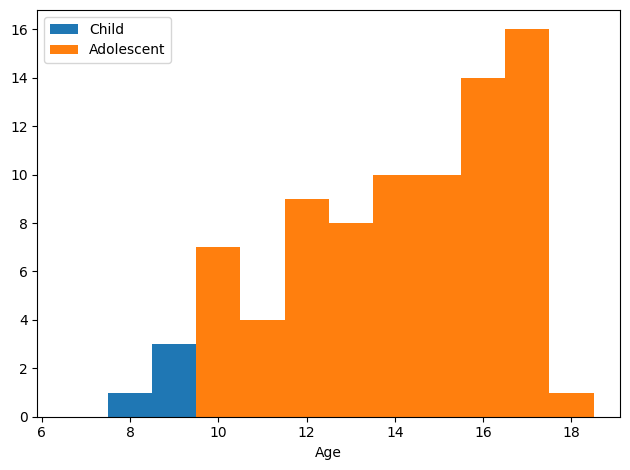

In [7]:
""" Histogram of ages """
import os
import matplotlib.pyplot as plt

fig, axis = plt.subplots()

bins = np.linspace(6.5, 18.5, 13)
child_df["age_dob"].hist(ax=axis, bins=bins, label="Child")
adolescent_df["age_dob"].hist(ax=axis, bins=bins, label="Adolescent", color="C1")

axis.grid(False)
axis.legend()
axis.set_xlabel("Age")

fig.tight_layout()

img_dir = "img/quali/"
if not os.path.exists(img_dir):
    os.makedirs(img_dir)
fig.savefig(f"{img_dir}age_hist.png")

In [8]:
"""
For the participants who didn't take part, find out why

"""

print(child_df[child_df["smart1_7to9"] == 2]["smart2_7to9"].value_counts(dropna=False))

# Here, 7 means "Other"
print(
    child_df[(child_df["smart1_7to9"] == 2) & (child_df["smart2_7to9"] == 7)][
        "smart2a_7to9"
    ]
)

Series([], Name: count, dtype: int64)
Series([], Name: smart2a_7to9, dtype: float64)


In [9]:
print(
    adolescent_df[adolescent_df["smart1_10to17"] == 2]["smart2_10to17"].value_counts(
        dropna=False
    )
)

# Here, 7 means "Other" and -9 means "Refused to answer"
print(
    adolescent_df[
        (adolescent_df["smart1_10to17"] == 2) & (adolescent_df["smart2_10to17"] == 7)
    ]["smart2a_10to17"]
)

Series([], Name: count, dtype: int64)
Series([], Name: smart2a_10to17, dtype: object)


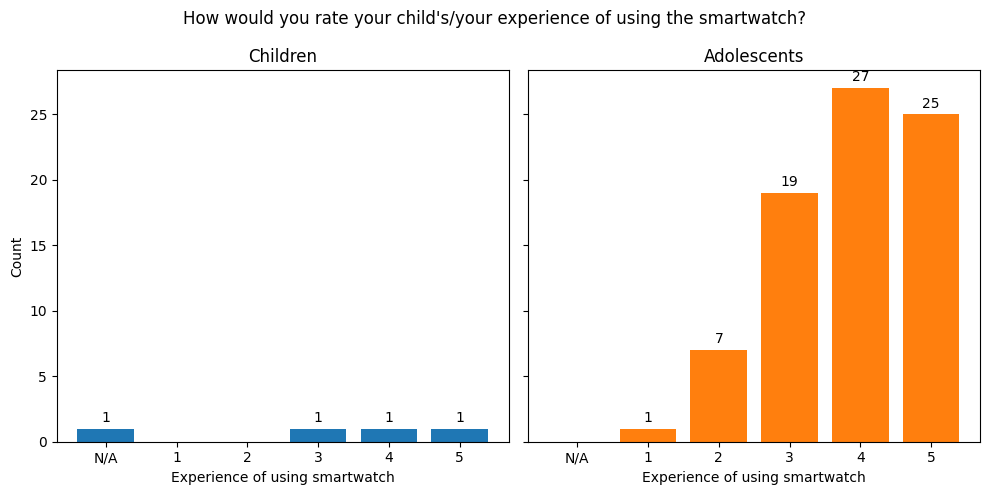

In [10]:
"""
Make a bar chart of experience of using the smartwatch

"""

child_counts = child_df["smart3_7to9"].value_counts(dropna=False)
adolescent_counts = adolescent_df["smart3_10to17"].value_counts(dropna=False)

# Replace the NaN in the index with 0
child_counts.index = child_counts.index.fillna(0)
adolescent_counts.index = adolescent_counts.index.fillna(0)

fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

axes[0].bar(child_counts.index, child_counts.values)
axes[1].bar(adolescent_counts.index, adolescent_counts.values, color="C1")

# Label each bar with the number
for i, v in child_counts.items():
    axes[0].text(i, v + 0.5, str(v), ha="center")
for i, v in adolescent_counts.items():
    axes[1].text(i, v + 0.5, str(v), ha="center")


for axis in axes:
    axis.set_xlabel("Experience of using smartwatch")
    axis.set_xticks(range(6), ["N/A", *range(1, 6)])

axes[0].set_title("Children")
axes[0].set_ylabel("Count")
axes[1].set_title("Adolescents")

fig.suptitle("How would you rate your child's/your experience of using the smartwatch?")
fig.tight_layout()
child_counts

fig.savefig(f"{img_dir}experience.png")

(smart4_7to9
 1.0    3
 3.0    1
 Name: count, dtype: int64,
 smart4_10to17
 -100.0     2
 -9.0       3
  1.0      24
  2.0      39
  3.0      11
 Name: count, dtype: int64)

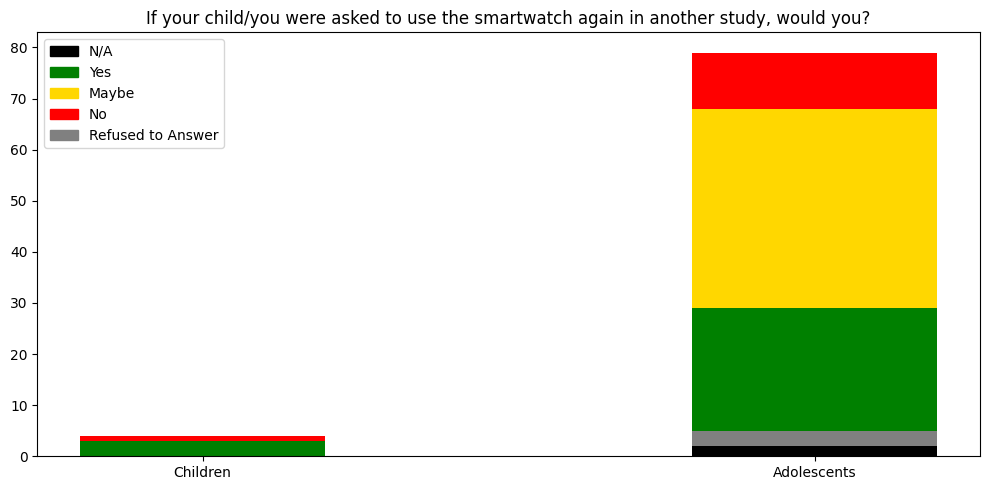

In [11]:
"""
Would you do it again?

"""

fig, axis = plt.subplots(figsize=(10, 5))

child_counts = child_df["smart4_7to9"].value_counts(dropna=False)
adolescent_counts = adolescent_df["smart4_10to17"].value_counts(dropna=False)

# Fill NA with a negative value so it appears at the bottom of my plot
na_val = -100
child_counts.index = child_counts.index.fillna(na_val)
adolescent_counts.index = adolescent_counts.index.fillna(na_val)

child_counts.sort_index(inplace=True)
adolescent_counts.sort_index(inplace=True)

child_counts, adolescent_counts
# Stacked bar chart
color = {na_val: "k", 1.0: "g", 2.0: "gold", 3.0: "r", -9.0: "grey"}

total = 0
for val, count in child_counts.items():
    axis.bar(0, count, color=color[val], label=i, bottom=total, width=0.4)
    total += count

total = 0
for val, count in adolescent_counts.items():
    axis.bar(1, count, color=color[val], label=i, bottom=total, width=0.4)
    total += count

axis.legend(
    handles=[plt.Rectangle((0, 0), 1, 1, color=color[val]) for val in color],
    labels=["N/A", "Yes", "Maybe", "No", "Refused to Answer"],
)

axis.set_xticks([0, 1], ["Children", "Adolescents"])

axis.set_title(
    "If your child/you were asked to use the smartwatch again in another study, would you?"
)

fig.tight_layout()
fig.savefig(f"{img_dir}again.png")

child_counts, adolescent_counts

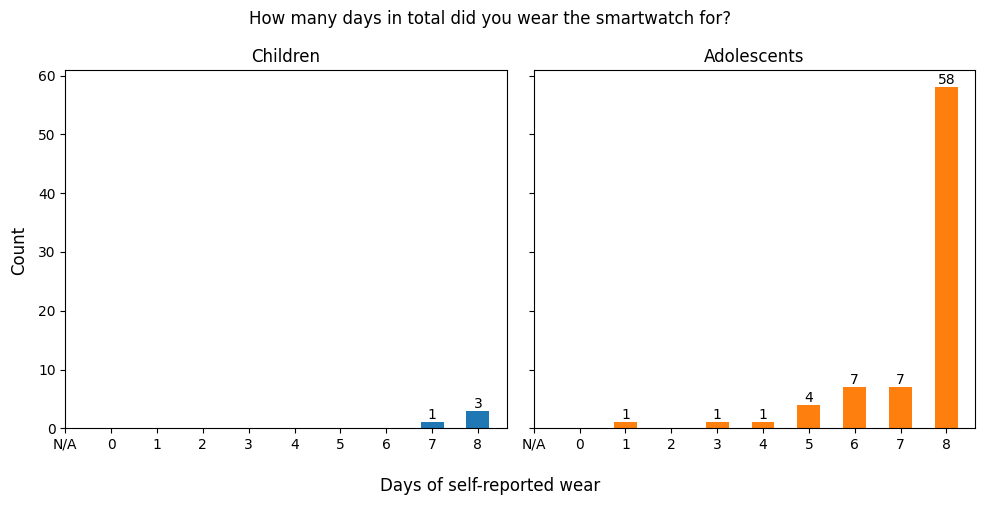

In [12]:
"""
Days of self-reported wear

"""

fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

child_counts = child_df["smart5_7to9"].value_counts(dropna=False)
adolescent_counts = adolescent_df["smart5_10to17"].value_counts(dropna=False)

# Fill NA with a negative value so it appears at the bottom of my plot
na_val = -1
child_counts.index = child_counts.index.fillna(na_val)
adolescent_counts.index = adolescent_counts.index.fillna(na_val)

child_counts.sort_index(inplace=True)
adolescent_counts.sort_index(inplace=True)

for i, val in child_counts.items():
    axes[0].bar(i, val, color="C0", width=0.5)
for i, val in adolescent_counts.items():
    axes[1].bar(i, val, color="C1", width=0.5)

# Label each bar with the number
for i, v in child_counts.items():
    axes[0].text(i, v + 0.5, str(v), ha="center")
for i, v in adolescent_counts.items():
    axes[1].text(i, v + 0.5, str(v), ha="center")

for axis in axes:
    axis.set_xticks(range(-1, 9), ["N/A", *range(0, 9)])

axes[0].set_title("Children")
axes[1].set_title("Adolescents")

fig.supxlabel("Days of self-reported wear")
fig.supylabel("Count")
fig.suptitle("How many days in total did you wear the smartwatch for?")

fig.tight_layout()
fig.savefig(f"{img_dir}wear.png")

In [13]:
"""
Reasons given for not wearing the smartwatch for the whole study

"""

child_counts = child_df[child_df["smart5_7to9"] != 8]["smart6_7to9"].value_counts(
    dropna=False
)
child_counts.index = child_counts.index.fillna(na_val)

lookup = {
    -9: "Refused to answer",
    1: "Did not like the look of the smartwatch",
    2: "Did not find the smartwatch comfortable to wear",
    3: "Recharging took too much time",
    4: "Did not see the benefit, when could not see the data",
    5: "Other reasons (please specify)",
    na_val: "N/A",
}

print("Children")
for i, val in child_counts.items():
    print("\t", lookup[i], val)

Children
	 Did not find the smartwatch comfortable to wear 1


In [14]:
adolescent_counts = adolescent_df[adolescent_df["smart5_10to17"] != 8][
    "smart6_10to17"
].value_counts(dropna=False)
adolescent_counts.index = adolescent_counts.index.fillna(na_val)

lookup = {
    -9: "Refused to answer",
    1: "Did not like the look of the smartwatch",
    2: "Did not find the smartwatch comfortable to wear",
    3: "Recharging took too much time",
    4: "Did not see the benefit, when could not see the data",
    5: "Other reasons (please specify)",
    na_val: "N/A",
}

print("Adolescents")
for i, val in adolescent_counts.items():
    print("\t", lookup[i], val)


# Other reasons
adolescent_df["smart6a_10to17"].value_counts()

Adolescents
	 Did not find the smartwatch comfortable to wear 9
	 Other reasons (please specify) 7
	 Refused to answer 3
	 Did not see the benefit, when could not see the data 2


smart6a_10to17
terlupa pakai selepas aktiviti merenang          1
-99                                              1
pihak sekolah tidak membenarkan memakai gajet    1
Terlupa                                          1
Kehabisan bateri                                 1
Lupa                                             1
Sakit dan gatal                                  1
Name: count, dtype: int64

Malay                                            | Count | English
-------------------------------------------------|-------|------------------------------------------
-99                                              | 1     | N/A  
Lupa                                             | 1     | "Forget"  
Terlupa                                          | 1     | "Forgotten"  
terlupa pakai selepas aktiviti merenang          | 1     | "Forgot to use after swimming activity"  
pihak sekolah tidak membenarkan memakai gajet    | 1     | "The school does not allow the use of gadgets"  
Kehabisan bateri                                 | 1     | "Out of battery"   
Sakit dan gatal                                  | 1     | "Pain and itching"  

In [15]:
"""
For those who said they would do the study again, how long would they do it for

"""

child_df[child_df["smart4_7to9"] == 1]["smart7_7to9"].value_counts(dropna=False)

smart7_7to9
7.0     2
30.0    1
Name: count, dtype: int64

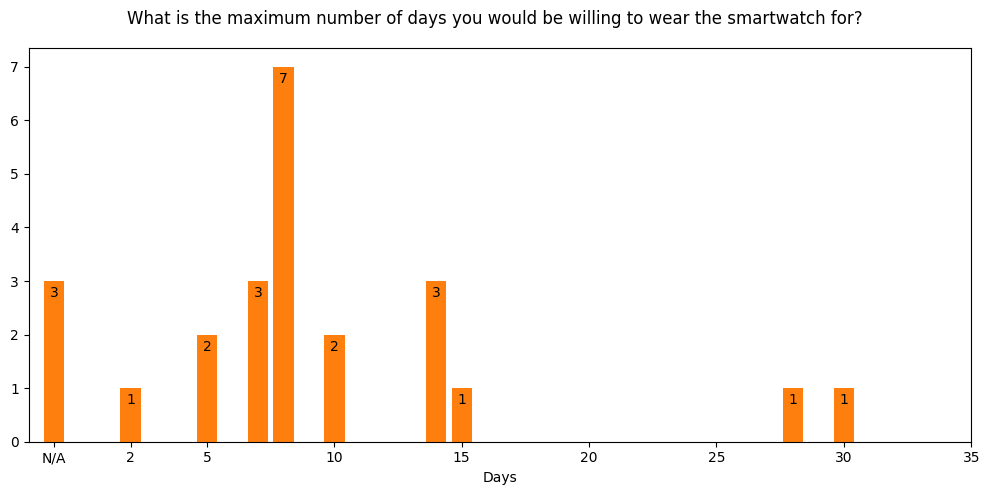

In [16]:
adolescent_counts = adolescent_df[adolescent_df["smart4_10to17"] == 1][
    "smart7_10to17"
].value_counts(dropna=False)

fig, axis = plt.subplots(figsize=(10, 5))
# Replace 99 with and NaN with -1 in the index
adolescent_counts.index = pd.Series(adolescent_counts.index).replace(-99, -1).values
adolescent_counts.index = adolescent_counts.index.fillna(-1)
adolescent_counts = adolescent_counts.groupby(adolescent_counts.index).sum()

axis.bar(adolescent_counts.index, adolescent_counts.values, color="C1")
for i, v in adolescent_counts.items():
    axis.text(i, v - 0.3, str(v), ha="center")

axis.set_xticks(
    [-1, 2, *axis.get_xticks()[2:]], ["N/A", 2, *axis.get_xticklabels()[2:]]
)
axis.set_xlim(-2, 35)
axis.set_xlabel("Days")
fig.suptitle(
    "What is the maximum number of days you would be willing to wear the smartwatch for?"
)

fig.tight_layout()
fig.savefig(f"{img_dir}max_days.png")

In [17]:
"""
What things did you dislike about the smartwatch, and can you suggest any improvements?

"""
child_df["smart8_7to9"].value_counts(dropna=False)

smart8_7to9
-99.0    3
 NaN     1
Name: count, dtype: int64

In [18]:
adolescent_df["smart8_10to17"].value_counts(dropna=False)

smart8_10to17
-99                            34
NaN                            29
Tiada                           2
Tidak                           2
Jangan pakai waktu bersenam     1
tanya soalan yang sama          1
TIADA                           1
-                               1
Semasa menulis                  1
tiada                           1
Meletakkan corak                1
Tak ada                         1
6 JAM SEHARI                    1
Ada penambaikan di jam          1
Tulis                           1
Berat dan mudah retak           1
Name: count, dtype: int64

Malay | Count | English
------|-------|--------
-99                           | 34| N/A
NaN                           | 29| N/A
\-                            |  1| -
Tiada                         |  2| "None"
Tidak                         |  2| "No"
TIADA                         |  1| "NO"
tiada                         |  1| "no"
Tak ada                       |  1| "There is no"
Semasa menulis                |  1| "While writing"
Tulis                         |  1| "Write"
6 JAM SEHARI                  |  1| "6 HOURS A DAY"
Jangan pakai waktu bersenam   |  1| "Don't use exercise time"
tanya soalan yang sama        |  1| "ask the same question"
Meletakkan corak              |  1| "Placing the pattern"
Berat dan mudah retak         |  1| "Heavy and easy to crack"
Ada penambaikan di jam        |  1| "There are improvements in the clock"

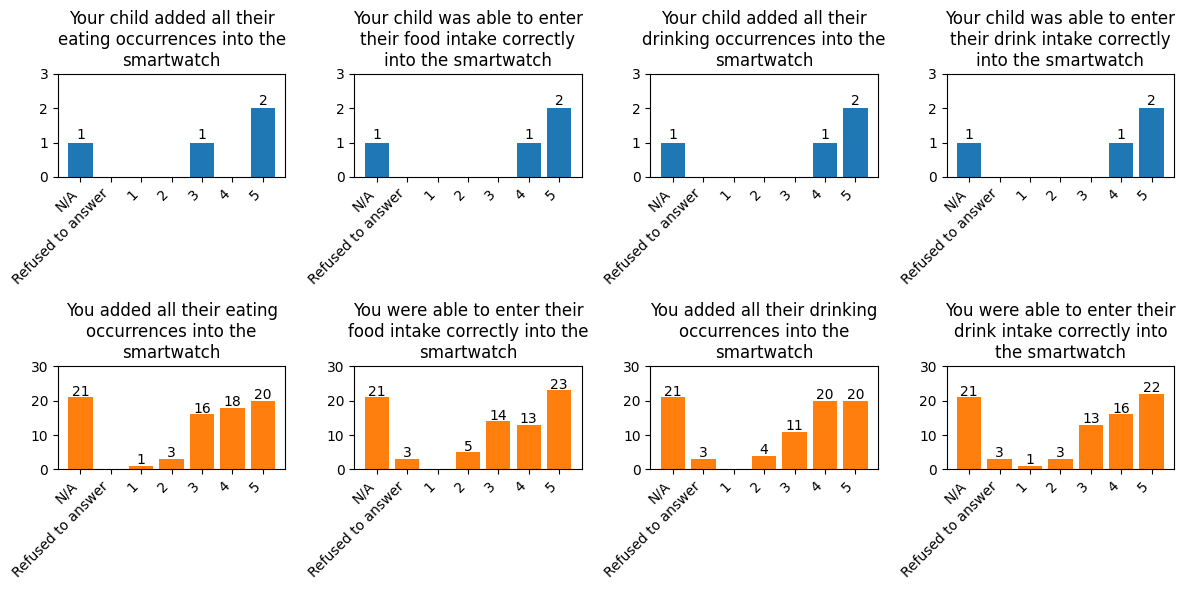

In [19]:
"""
Labelled bar plots of smartwatch experience out of 5

"""

from textwrap import wrap

fig, axes = plt.subplots(2, 4, figsize=(12, 6))
ticks = tuple(range(-1, 6))
for df, axs, col, colour, text_d in zip(
    [child_df, adolescent_df],
    axes,
    ["smart9_opt*_7to9", "smart_opt*_10to17"],
    ["C0", "C1"],
    [0.1, 0.5]
):
    for i, axis in enumerate(axs, start=1):
        col_name = col.replace("*", str(i))
        counts = df[col_name].value_counts(dropna=False)
        counts.index = counts.index.fillna(-1)

        # Replace Refused to respond
        counts.index = counts.index.where(counts.index != -9, 0)

        axis.bar(counts.index, counts.values, color=colour)

        # Label the bars
        for j, v in counts.items():
            axis.text(j, v + text_d, str(v), ha="center")

        axis.set_xticks(
            ticks,
            ["N/A", "Refused to answer", *range(1, 6)],
            rotation=45,
            ha="right",
        )


titles = [
    "Your child added all their eating occurrences into the smartwatch",
    "Your child was able to enter their food intake correctly into the smartwatch",
    "Your child added all their drinking occurrences into the smartwatch",
    "Your child was able to enter their drink intake correctly into the smartwatch",
    "You added all their eating occurrences into the smartwatch",
    "You were able to enter their food intake correctly into the smartwatch",
    "You added all their drinking occurrences into the smartwatch",
    "You were able to enter their drink intake correctly into the smartwatch",
]
for title, axis in zip(titles, axes.flat):
    axis.set_title("\n".join(wrap(title, 30)))

for axis in axes[0]:
    axis.set_ylim(0, 3)
for axis in axes[1]:
    axis.set_ylim(0, 30)

fig.tight_layout()
fig.savefig(f"{img_dir}experience_5.png")

In [20]:
"""
Table for charging responses

"""

child_counts = child_df["smart10_7to9"].value_counts(dropna=False)
adolescent_counts = adolescent_df["smart10_10to17"].value_counts(dropna=False)
print(adolescent_counts.sum())
child_counts, adolescent_counts

79


(smart10_7to9
 Senang     1
 NaN        1
 Gembira    1
 Mudah      1
 Name: count, dtype: int64,
 smart10_10to17
 NaN                                         25
 -99                                         14
 Ok                                           5
 Baik                                         3
 Seronok                                      3
 Senang                                       2
 senang                                       2
 mudah                                        2
 Baik dan mudah                               1
 Sangat baik                                  1
 Agak mudah                                   1
 Okay je                                      1
 Biasa saja                                   1
 SELESA                                       1
 Tak selesa                                   1
 Susah sikit                                  1
 Gembira, sebab boleh menggunakannya esok     1
 Biasa                                        1
 Sangat mudah         

| Children - charging | Malay   | English | Count |
|---------------------|---------|---------|-------|
|                     | NaN     | NaN     | 1     |
|                     | Senang  | Happy   | 1     |
|                     | Gembira | Happy   | 1     |
|                     | Mudah   | Easy    | 1     |



| Adolescent - charging | Malay                                    | English                             | Count |
|-----------------------|------------------------------------------|-------------------------------------|-------|
|                       | NaN                                      | NaN                                 | 25    |
|                       | -99                                      | Refused to answer                   | 14    |
|                       | Sangat selesa                            | very comfortable                    | 1     |
|                       | Sangat baik                              | very good                           | 1     |
|                       | Sangat mudah                             | very easy                           | 1     |
|                       | best                                     | best                                | 1     |
|                       | Baik                                     | Good                                | 3     |
|                       | Mudah                                    | easy                                | 1     |
|                       | Mudah dicas                              | easy to charge                      | 1     |
|                       | Seronok                                  | Fun                                 | 3     |
|                       | Senang                                   | Happy                               | 2     |
|                       | senang                                   | happy                               | 2     |
|                       | Gembira, sebab boleh menggunakannya esok | happy because i can use it tomorrow | 1     |
|                       | mudah                                    | easy                                | 2     |
|                       | SELESA                                   | comfortable                         | 1     |
|                       | Selesa                                   | comfortable                         | 1     |
|                       | baik                                     | good                                | 1     |
|                       | Baik dan mudah                           | good and easy                       | 1     |
|                       | Agak mudah                               | quite easy                          | 1     |
|                       | Ok                                       | ok                                  | 5     |
|                       | Okey                                     | ok                                  | 1     |
|                       | Okey je                                  | it's ok                             | 1     |
|                       | OK                                       | ok                                  | 1     |
|                       | Okay je                                  | it's ok                             | 1     |
|                       | okay                                     | ok                                  | 1     |
|                       | Biasa                                    | normal                              | 1     |
|                       | Biasa saja                               | it's normal                         | 1     |
|                       | tiada perasaan                           | no feelings                         | 1     |
|                       | Tiada                                    | none                                | 1     |
|                       | Tak selesa                               | uncomfortable                       | 1     |
|                       | Susah sikit                              | a little difficult                  | 1     |

In [21]:
"""
Table for any other comments

"""

parent_counts = child_df["smart11a_7to9"].value_counts(dropna=False)
child_counts = child_df["smart11b_7to9"].value_counts(dropna=False)
adolescent_counts = adolescent_df["smart11_10to17"].value_counts(dropna=False)

print(parent_counts, child_counts, adolescent_counts, sep="\n\n")

smart11a_7to9
-99.0    4
Name: count, dtype: int64

smart11b_7to9
-99.0    4
Name: count, dtype: int64

smart11_10to17
-99                                                                                                                                                      55
NaN                                                                                                                                                      16
tiada                                                                                                                                                     1
tidak selesa dipakai kerana memakainya dalam jangka masa yang lama                                                                                        1
Saya rasa sungguh risau apabila memakai jam aktiviti monitor ketika tidur kerana takut akan merosakkan jam tersebut akibat terketuk pada tiang katil.     1
-                                                                                                    


| Adolescents | Malay                                                                                                                                                 | English                                                                                                                                    | Count |
|-------------|-------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------|-------|
|             | -99                                                                                                                                                   | -99                                                                                                                                        | 55    |
|             | NaN                                                                                                                                                   | NaN                                                                                                                                        | 16    |
|             | -                                                                                                                                                     | -                                                                                                                                          | 1     |
|             | 5                                                                                                                                                     | 5                                                                                                                                          | 1     |
|             | 6                                                                                                                                                     | 6                                                                                                                                          | 1     |
|             | Selesa                                                                                                                                                | Comfortable                                                                                                                                | 1     |
|             | Seronok                                                                                                                                               | It's fun                                                                                                                                   | 1     |
|             | tiada                                                                                                                                                 | no                                                                                                                                         | 1     |
|             | tidak selesa dipakai kerana memakainya dalam jangka masa yang lama                                                                                    | uncomfortable to wear because of wearing it for a long time                                                                                | 1     |
|             | Saya rasa sungguh risau apabila memakai jam aktiviti monitor ketika tidur kerana takut akan merosakkan jam tersebut akibat terketuk pada tiang katil. | I feel really worried when wearing the monitor activity clock while sleeping for fear of damaging the clock due to knocking on the bedpost | 1     |

In [22]:
"""
Cross-check self-reported wear with the smartwatch data

"""

from ema import clean

# Read smartwatch data
meal_df = clean.cleaned_smartwatch_keepday0(keep_catchups=False)[
    ["p_id", "delta", "meal_type"]
]

# Keep only the positive entries
print(len(meal_df))
meal_df = meal_df[meal_df["meal_type"].isin({"Meal", "Drink", "Snack", "No food/drink"})]
print(len(meal_df))

# Convert delta to days only
meal_df["delta"] = meal_df["delta"].dt.days

# Collapse to get one row per participant, showing the number of days they entered on
entries_df = pd.DataFrame(columns=["p_id", "days_entered"], dtype=np.float64)
for i, (p_id, group) in enumerate(meal_df.groupby("p_id")):
    days_entered = set()
    for _, row in group.iterrows():
        days_entered.add(row["delta"])

    entries_df = pd.concat(
        [
            entries_df,
            pd.DataFrame(
                {"p_id": [p_id], "days_entered": [len(days_entered)]}, index=[i]
            ),
        ]
    )

# Combine it with the survey responses
print(accepted_df.columns)
entries_df = entries_df.merge(
    accepted_df[["residents_id", "smart5_7to9", "smart5_10to17", "age_dob"]],
    left_on="p_id",
    right_on="residents_id",
    how="left",
)

entries_df["self_reported"] = entries_df["smart5_10to17"].combine_first(
    entries_df["smart5_7to9"]
)

entries_df.head()

/home/mh19137/seaco_malaysia/ema/clean.py:119: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Normal' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  copy.loc[start_time, col_name] = "Normal"
/home/mh19137/seaco_malaysia/ema/clean.py:190: UserWarning: Long catchup: not marking Meal at 2022-05-19 09:02:49 as catchup
  warnings.warn(


 Open ended catchup at 2022-02-11 20:02:05 ended by No response at 2022-02-12 08:02:11
 Open ended catchup at 2022-02-14 20:26:30 ended by No response at 2022-02-15 08:02:16
 Open ended catchup at 2022-04-19 08:01:14 ended by No catch-up at 2022-04-19 08:01:17
 Open ended catchup at 2022-06-27 15:53:14 ended by Catch-up start at 2022-06-27 15:54:06
 Open ended catchup at 2021-12-31 22:11:10 ended by No catch-up at 2022-01-01 08:01:15
 Open ended catchup at 2022-05-24 07:25:36 ended by Catch-up start at 2022-05-24 07:26:00
 Open ended catchup at 2022-03-21 08:01:57 ended by No catch-up at 2022-03-21 08:02:04
 Open ended catchup at 2022-03-07 18:33:30 ended by No catch-up at 2022-03-07 18:33:34
 Open ended catchup at 2022-03-07 18:37:08 ended by No catch-up at 2022-03-07 18:37:14
 Open ended catchup at 2022-03-07 19:29:23 ended by No response at 2022-03-08 08:02:56
 Open ended catchup at 2022-03-08 08:30:40 ended by No catch-up at 2022-03-08 08:31:08
 Open ended catchup at 2022-03-08 09:

,p_id,days_entered,residents_id,smart5_7to9,smart5_10to17,age_dob,self_reported
0,141.0,8.0,141,8.0,NaN,9.0,8.0
1,638.0,6.0,638,NaN,5.0,17.0,5.0
2,765.0,8.0,765,NaN,8.0,17.0,8.0
3,924.0,8.0,924,NaN,8.0,17.0,8.0
4,1077.0,8.0,1077,NaN,8.0,14.0,8.0


self_reported=8.0, measured=2.0, len(grp)=3
self_reported=8.0, measured=3.0, len(grp)=3
self_reported=8.0, measured=4.0, len(grp)=2
self_reported=8.0, measured=5.0, len(grp)=2
self_reported=8.0, measured=6.0, len(grp)=7
self_reported=8.0, measured=7.0, len(grp)=5
self_reported=8.0, measured=8.0, len(grp)=39
self_reported=5.0, measured=2.0, len(grp)=1
self_reported=5.0, measured=6.0, len(grp)=1
self_reported=5.0, measured=8.0, len(grp)=2
self_reported=6.0, measured=2.0, len(grp)=1
self_reported=6.0, measured=5.0, len(grp)=1
self_reported=6.0, measured=6.0, len(grp)=1
self_reported=6.0, measured=7.0, len(grp)=1
self_reported=6.0, measured=8.0, len(grp)=3
self_reported=1.0, measured=3.0, len(grp)=1
self_reported=7.0, measured=5.0, len(grp)=1
self_reported=7.0, measured=8.0, len(grp)=6
self_reported=3.0, measured=2.0, len(grp)=1
self_reported=4.0, measured=5.0, len(grp)=1
0.33119641458168614


(40, 82)

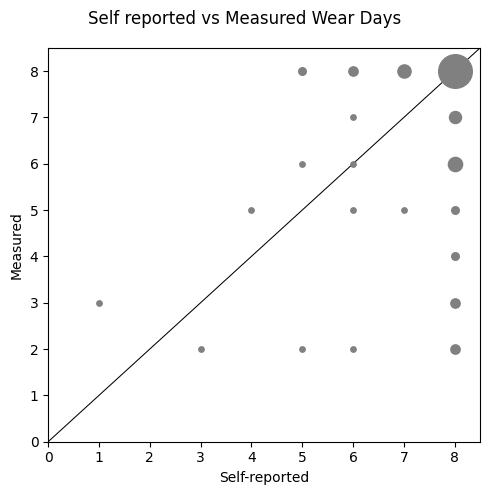

In [23]:
""" Scatter plot where the size corresponds to the number of participants """

fig, axis = plt.subplots(figsize=(5, 5))

n_match = 0
for self_reported in entries_df["self_reported"].unique():
    df_slice = entries_df[entries_df["self_reported"] == self_reported]
    for measured, grp in df_slice.groupby("days_entered"):
        axis.scatter(
            self_reported,
            measured,
            s=len(grp) * 15,
            label=self_reported,
            color="grey",
            zorder=4,
        )
        if self_reported == measured:
            n_match += len(grp)
        print(f"{self_reported=}, {measured=}, {len(grp)=}")


axis.plot([0, 8.5], [0, 8.5], "k", linewidth=0.75, zorder=1)

# correlation
print(entries_df["self_reported"].corr(entries_df["days_entered"]))

axis.set_xlim(0, 8.5)
axis.set_ylim(0, 8.5)

axis.set_ylabel("Measured")
axis.set_xlabel("Self-reported")

fig.suptitle("Self reported vs Measured Wear Days")

fig.tight_layout()
fig.savefig(f"{img_dir}entry_days_crosscheck.png")

n_match, len(entries_df)

In [24]:
pd.__version__

'2.2.0'